In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 데이터 경로 설정해 주기

In [99]:
train = "../data/titanic/train.csv"
test = "../data/titanic/test.csv"

# CSV파일을 Pandas DataFrame으로 만들기

In [100]:
dfTrain = pd.read_csv(train)
dfTest = pd.read_csv(test)

# 데이터 feature 확인

In [101]:
dfData = dfTrain
dfData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data 훑어보기

In [102]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Object 제외한 나머지 데이터에 대한 평균/표준편차/사분위값 확인

In [103]:
dfData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
dfData.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [105]:
dfData.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

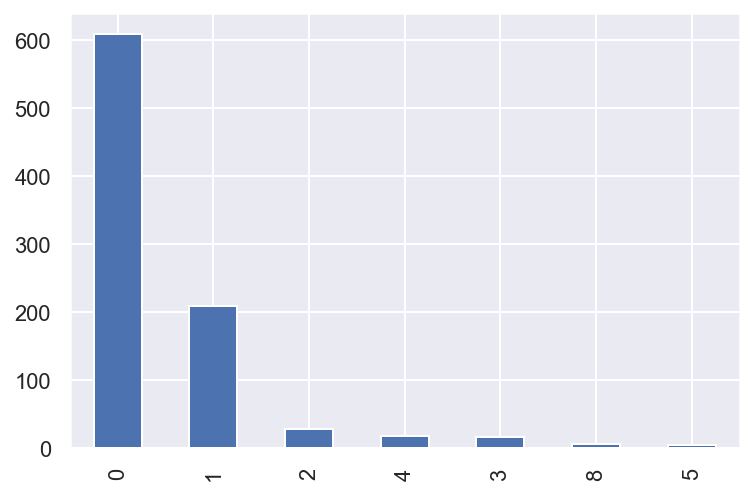

In [106]:
dfData.SibSp.value_counts().plot.bar()
plt.show()

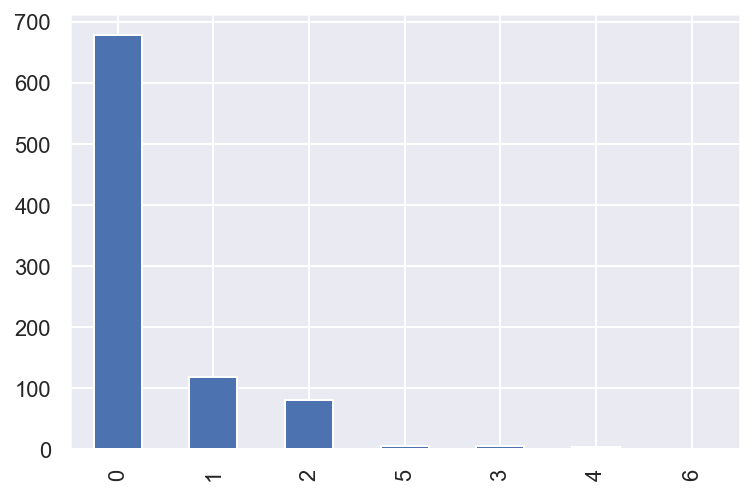

In [107]:
dfData.Parch.value_counts().plot.bar()
plt.show()

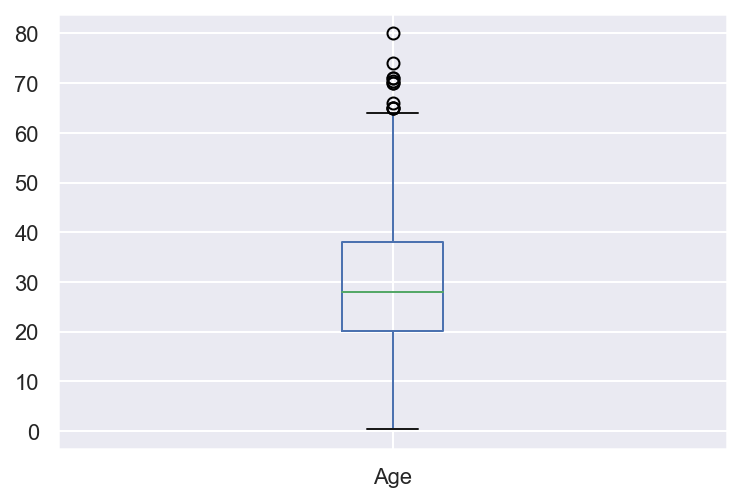

In [108]:
dfData.Age.plot.box()
plt.show()

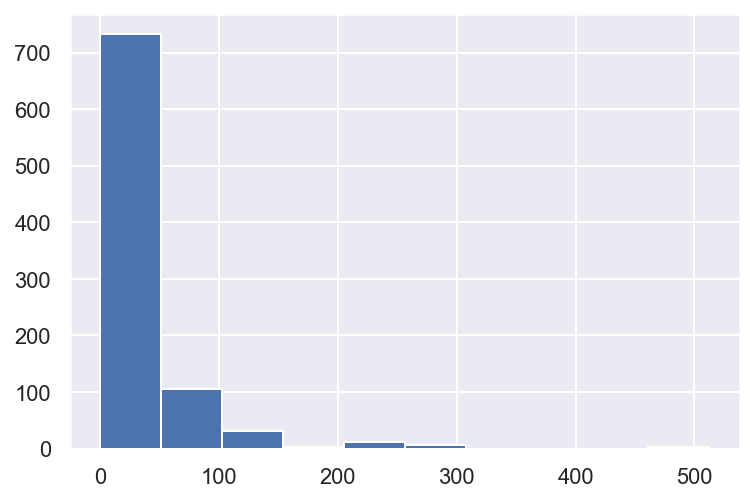

In [109]:
dfData.Fare.hist()
plt.show()

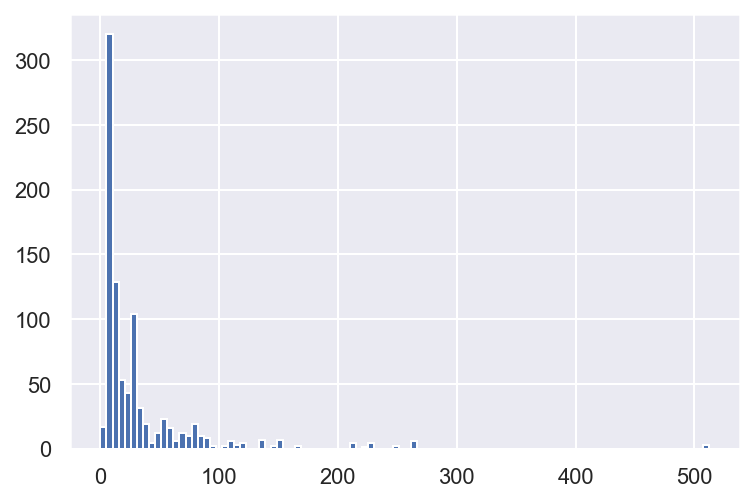

In [110]:
dfData.Fare.hist(bins=100)
plt.show()

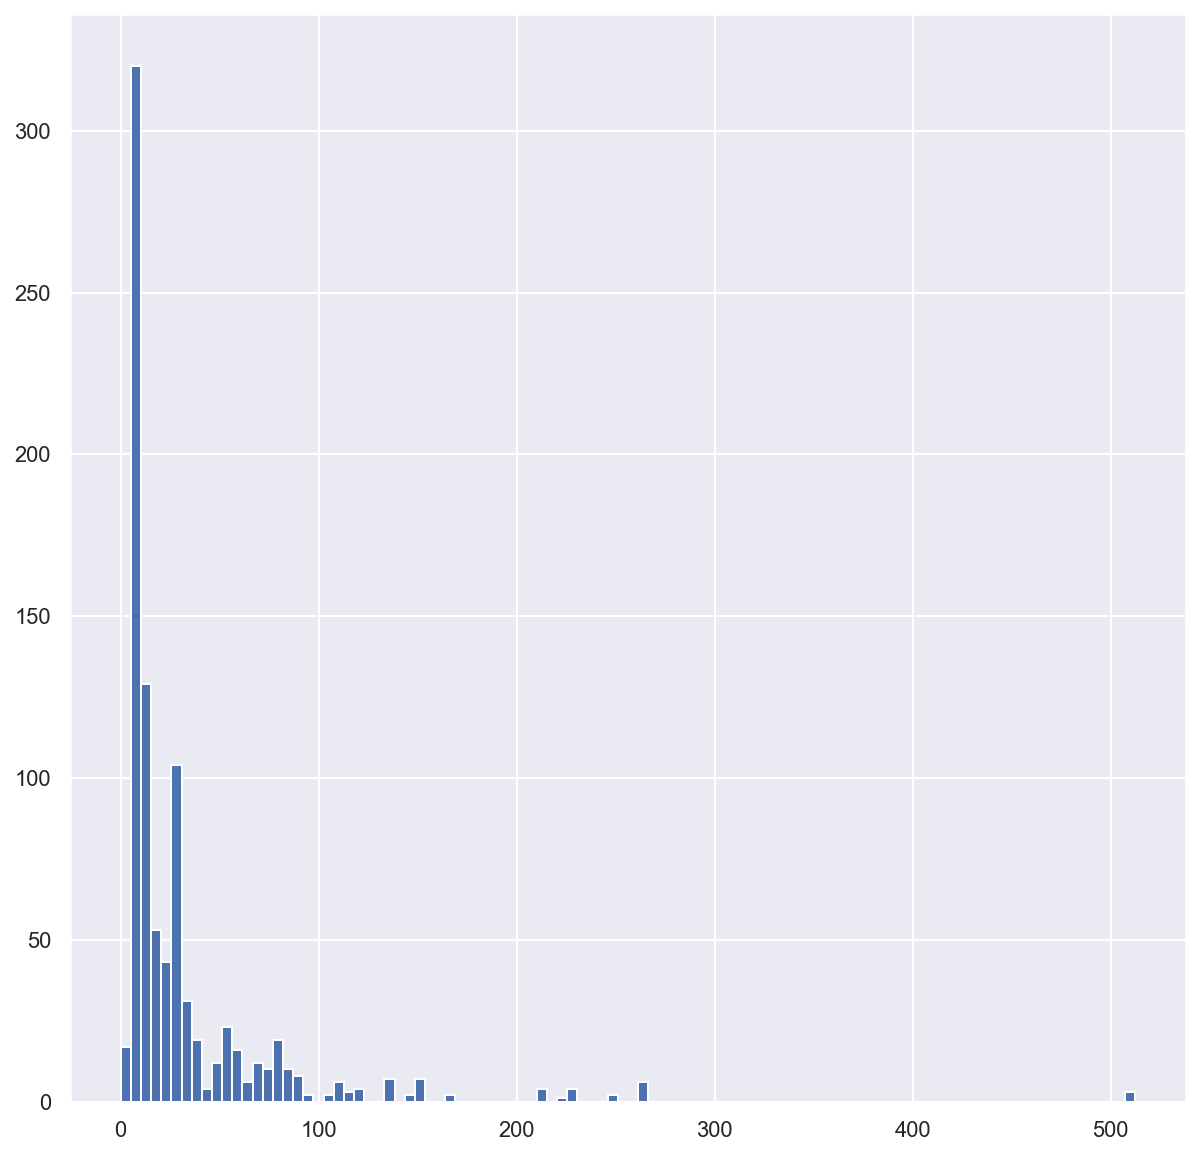

In [111]:
dfData.Fare.hist(bins=100,figsize=(10,10))
plt.show()

## 특정 feature에 따른 생존여부 확인

### 성별

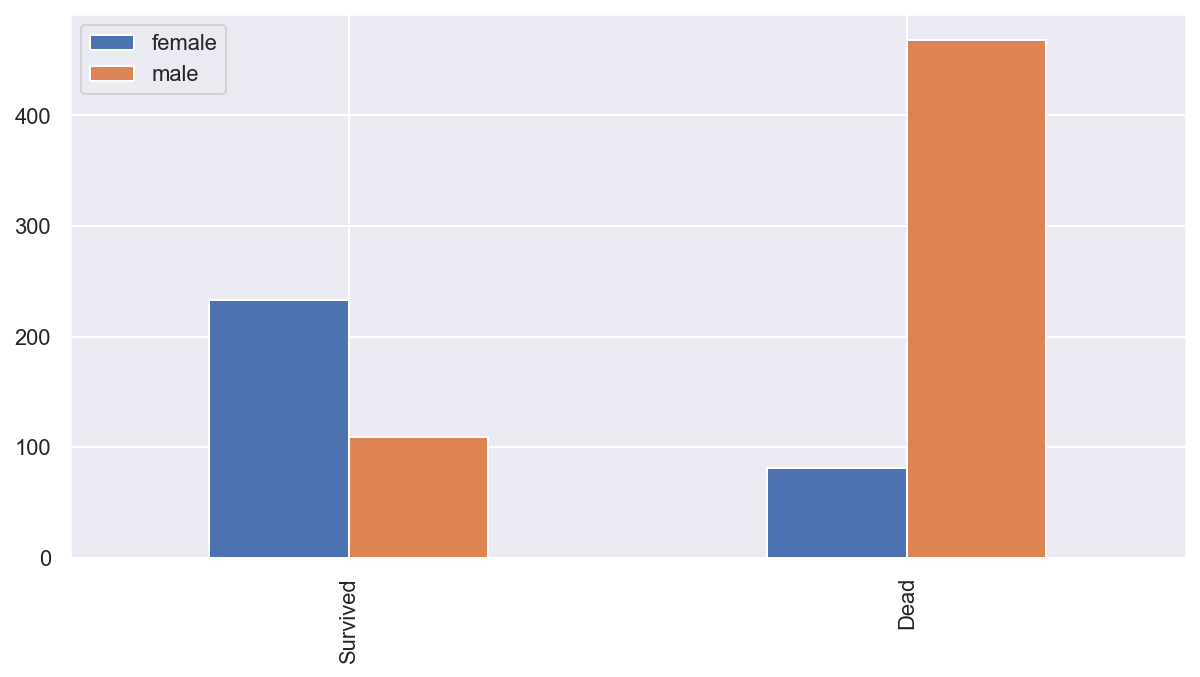

In [112]:
survived = dfData[dfData["Survived"]==1]["Sex"].value_counts()
dead = dfData[dfData["Survived"]==0]["Sex"].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ["Survived", "Dead"]
df.plot(kind="bar", figsize=(10,5))
plt.show()

### 티켓 등급

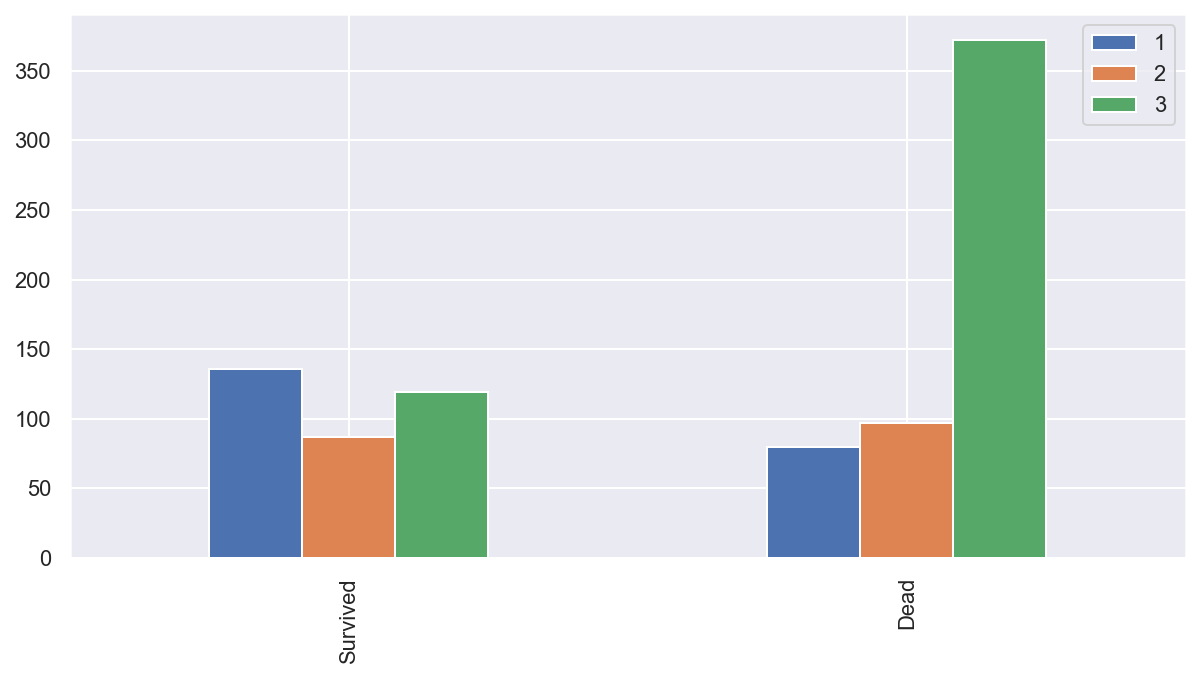

In [113]:
survived = dfData[dfData["Survived"]==1]["Pclass"].value_counts()
dead = dfData[dfData["Survived"]==0]["Pclass"].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ["Survived", "Dead"]
df.plot(kind="bar", figsize=(10,5))
plt.show()

### 형제/배우자 여부

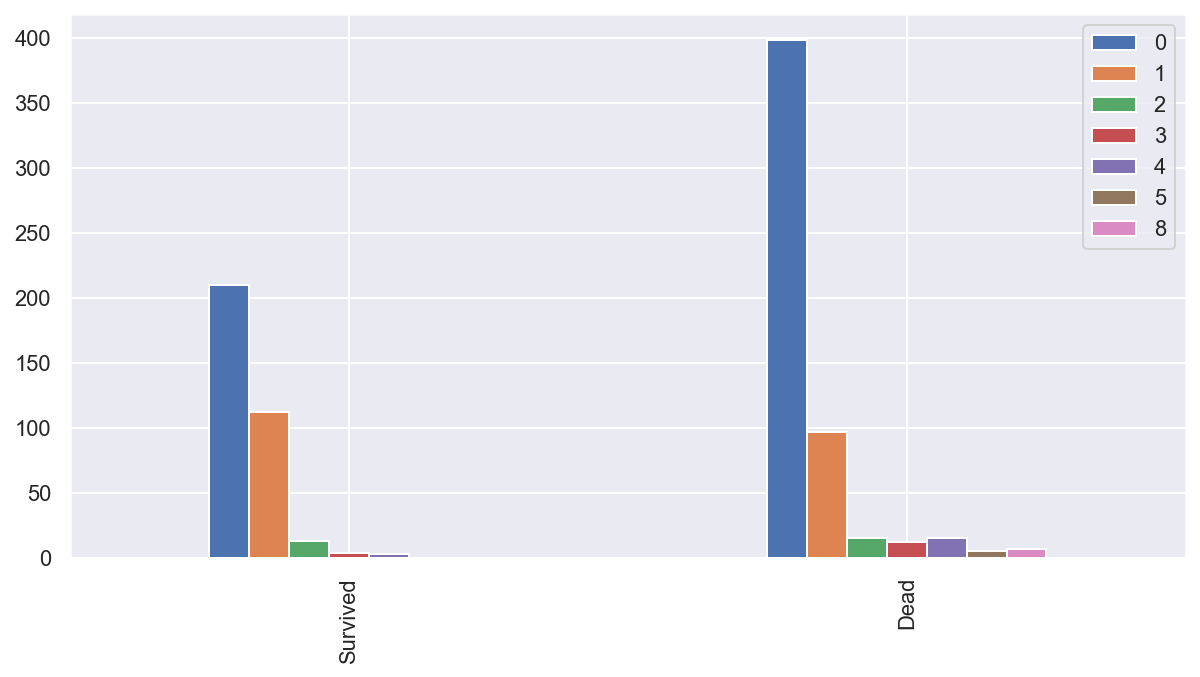

In [114]:
survived = dfData[dfData["Survived"]==1]["SibSp"].value_counts()
dead = dfData[dfData["Survived"]==0]["SibSp"].value_counts()
df = pd.DataFrame([survived, dead])
df.index = ["Survived", "Dead"]
df.plot(kind="bar", figsize=(10,5))
plt.show()

### 재사용 코드를 함수로

In [115]:
def chart(feature):
    survived = dfData[dfData["Survived"]==1][feature].value_counts()
    dead = dfData[dfData["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", figsize=(10,5))
    plt.show()

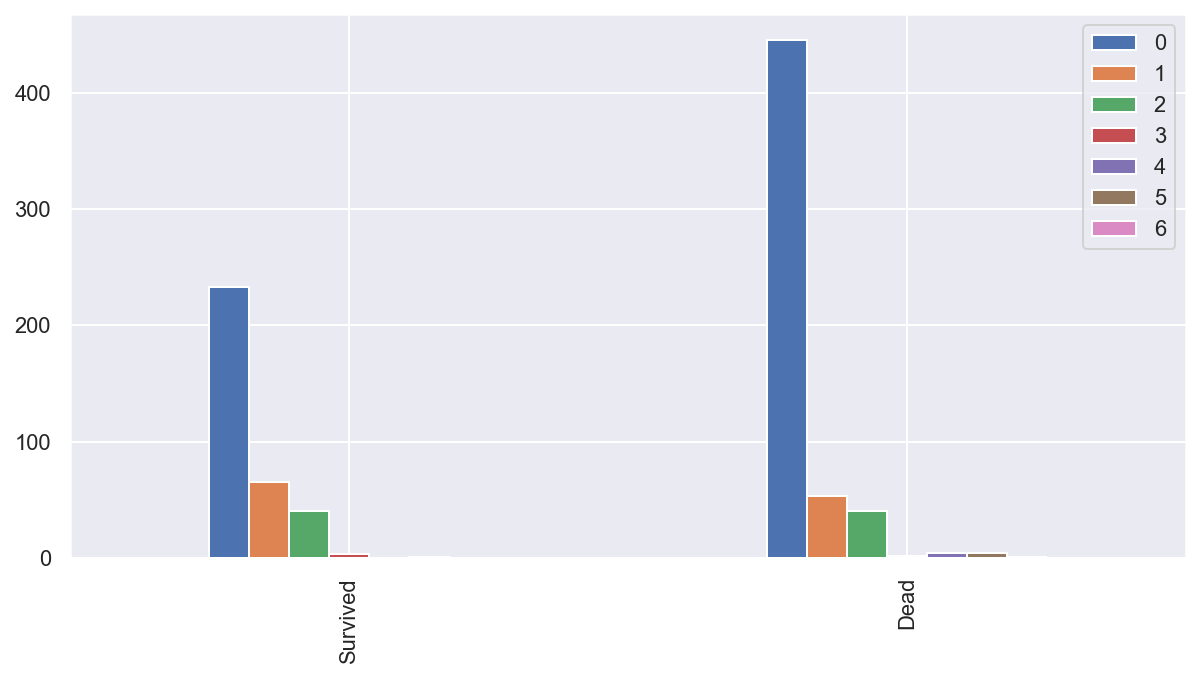

In [116]:
chart("Parch") # 부모/자녀 여부

# 더 해볼 것들
## 1. Test 데이터와 비교
## 2. 간단한 분류 모델 만들어 보기